# Visualize files
- manhattan.geojson
- requests.csv
- vehicle_events.csv
- vehicle_events_pnas.csv
- vehicle_paths.csv
- vehicle_paths.zip
- vehicle_paths_pnas.csv

In [2]:
import os
import requests
import shapely
import json
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import itertools
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Requests

In [108]:
requestspd = pd.read_csv('requests.csv')

In [109]:
requestspd.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,1380949200,1149,725,218,3601
1,1380949200,1225,1714,2003,3601
2,1380949200,1237,3143,1314,2218
3,1380949200,1323,3566,1330,2573
4,1380949200,1328,2466,1323,2473


In [110]:
print(len(requestspd.Requested_Pickup.sort_values().unique()))
requestspd.Requested_Pickup.sort_values().unique()

3561


array([   0,    1,    2, ..., 4403, 4405, 4406])

In [111]:
print(len(requestspd.Actual_Dropoff.sort_values().unique()))
requestspd.Actual_Dropoff.sort_values().unique()

3749


array([  -1,    0,    1, ..., 4406, 4409, 4410])

# Vehicles

In [85]:
vehicle_eventspd = pd.read_csv('vehicle_events.csv')
vehicle_events_pnaspd = pd.read_csv('vehicle_events_pnas.csv')
vehicle_pathspd = pd.read_csv('vehicle_paths.csv')
vehicle_paths_pnaspd = pd.read_csv('vehicle_paths_pnas.csv')

In [86]:
print(vehicle_events_pnaspd.Requested_Stop_Intersection.unique()vehicle_eventspd.head()

SyntaxError: invalid syntax (<ipython-input-86-6301f9e94567>, line 1)

In [ ]:
vehicle_eventspd.head()

In [ ]:
print(len(vehicle_eventspd.Requested_Stop_Intersection.sort_values().unique()))
vehicle_eventspd.Requested_Stop_Intersection.sort_values().unique()

In [ ]:
vehicle_events_pnaspd.Requested_Stop_Intersection.unique()

In [ ]:
vehicle_pathspd.head()

In [ ]:
vehicle_pathspd.Num_Passengers.unique()

In [ ]:
# vehicle_paths_pnaspd.head()
vehicle_paths_pnaspd.Num_Passengers.unique()

In [ ]:
manhattan = gpd.read_file('manhattan.geojson')

In [ ]:
manhattan.id.unique()

,id,w,geometry
9624,9624,459,"LINESTRING (-73.9326239 40.8632443, -73.933655..."


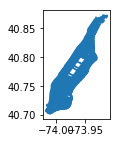

In [87]:
manhattan.plot(figsize=(2,2))
manhattan.tail(1)

# Problem 1

1. What is the serving rate for each scenario throughout the day, comparing to the overall serving rate? Serving rate is the number of successfully matched trip in a period of time. For example, is the serving rate higher in the rush hour or at night

In [88]:
# Successfull matched trup

In [89]:
# Calculate time of the day

In [112]:
requestspd['datetime'] = requestspd.Timestamp.astype('datetime64[s]')
requestspd['hour_of_timestamp'] = requestspd['datetime'].dt.hour

In [122]:
requestspd.tail()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,datetime,hour_of_timestamp,Successfull
383064,1381035597,1391,2536,1393,3993,2013-10-06 04:59:57,4,1.0
383065,1381035597,1649,3209,1650,3953,2013-10-06 04:59:57,4,1.0
383066,1381035597,450,3150,-1,-1,2013-10-06 04:59:57,4,NaN
383067,1381035598,2682,2369,-1,-1,2013-10-06 04:59:58,4,NaN
383068,1381035599,419,1391,4052,1396,2013-10-06 04:59:59,4,1.0


In [114]:
requestspd['Successfull'] = requestspd.Actual_Pickup[requestspd.Actual_Pickup!=-1].apply(lambda x: 1)

In [115]:
# requestspd.Actual_Pickup[requestspd.Actual_Pickup==-1].apply(lambda x: -x)

In [116]:
requestspd.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,datetime,hour_of_timestamp,Successfull
0,1380949200,1149,725,218,3601,2013-10-05 05:00:00,5,1.0
1,1380949200,1225,1714,2003,3601,2013-10-05 05:00:00,5,1.0
2,1380949200,1237,3143,1314,2218,2013-10-05 05:00:00,5,1.0
3,1380949200,1323,3566,1330,2573,2013-10-05 05:00:00,5,1.0
4,1380949200,1328,2466,1323,2473,2013-10-05 05:00:00,5,1.0


In [117]:
requestspd_sorted = requestspd.groupby(by='hour_of_timestamp').count()

In [118]:
requestspd_sorted.tail()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff,datetime,Successfull
hour_of_timestamp,,,,,,,
19,19383,19383,19383,19383,19383,19383,8991
20,17988,17988,17988,17988,17988,17988,9365
21,14773,14773,14773,14773,14773,14773,9531
22,19137,19137,19137,19137,19137,19137,9145
23,25012,25012,25012,25012,25012,25012,8638


In [119]:
requestspd_sorted['serving rate'] = requestspd_sorted.Successfull/requestspd_sorted.Actual_Pickup

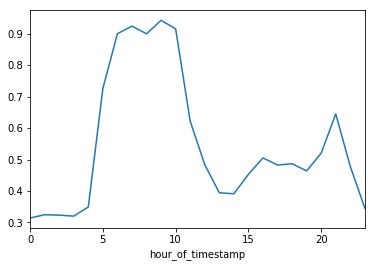

In [120]:
requestspd_sorted['serving rate'].plot()

# Problem 2

2.For  those  trips  thatcould  not  be  served,  do  they  follow  a  spatial  or  temporal  pattern?  For  example, are most of those trips originated in particular regions, and of certain times?

3.For  the  entire  simulation,  we  limit  vehicle  speed  to  under  25mph.  Could  you  see  any  vehicle  travel exceeded those limits? If so, could you show us where (and potentially how) that happen?

4.We also limit vehicle capacity to at most 4 passengers. Were there vehicles violating this condition? If so, can you show any pattern about these vehicles? For example, how many of them were violating, and where were they distributed in both time and space?

5.What  can  we  learn  about  the  vehicle  utilization?  Are  most  of  them  empty,  or  with  1,  2,  3  or  4 passengers?  Are  there  particular  vehicles  that  tend  to  ride  with  more  passengers  than  others?  If  so, how are they distributedin space and time.

6.Are most vehicle moving or idling? In which part of the city that we see vehicle idling/moving more often?  For  example,  are  there  any  “dead  zone”  where  a  vehicle  just  drops  off  passengers,  and  stay idling forever?

7.We  want  to  understand  the  trends  among  vehicles  in  term  distance  travel,  average  number  of passengers,  the  number  of  revenue  trips  (a  pair  of  pickup/dropoff),  the  number  of  rebalance  trips (stops  with  0  passengers  but  positive  duration),  and  idling  time.  How  can  you  help  us  explore  this trends?

8.If we are to pick a particular vehicle ID, how can we effectively illustrate its activities throughout the day?